# recommending movies(using python)


In [2]:
#importing libraries 

import pandas as pd
import numpy as np

#get the data and merge them as per movieId

ratings=pd.read_csv('ratings.csv')

tags=pd.read_csv('tags.csv')

links=pd.read_csv('links.csv')

movies=pd.read_csv('movies.csv')

df=pd.merge(ratings,movies,on='movieId')
df1=pd.merge(df,tags,on='movieId')
df2=pd.merge(df1,links,on='movieId')


df2.head()

,userId_x,movieId,rating,timestamp_x,title,genres,userId_y,tag,timestamp_y,imdbId,tmdbId
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,114709,862.0
1,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825,114709,862.0
2,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,1525286013,114709,862.0
3,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,114709,862.0
4,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825,114709,862.0


In [3]:
#importing matplotlib and seaborn for visualization

import matplotlib.pyplot as plt
import seaborn as sns
#seaborn is a python data visualization it provides high level interface for drawing 
sns.set_style('dark')
%matplotlib inline

#creating a dataframe with average rating 

df2.groupby('title')['rating'].mean().sort_values(ascending=False).head()





title
Woman Under the Influence, A (1974)    5.0
Who Killed Chea Vichea? (2010)         5.0
More (1998)                            5.0
Come and See (Idi i smotri) (1985)     5.0
Crossing Delancey (1988)               5.0
Name: rating, dtype: float64

In [4]:
#creating a data frame with number of ratings

df2.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Pulp Fiction (1994)                                               55567
Fight Club (1999)                                                 11772
Star Wars: Episode IV - A New Hope (1977)                          6526
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)     4655
2001: A Space Odyssey (1968)                                       4469
Name: rating, dtype: int64

In [9]:
# creating a data frame with  mean values

ratings_title=pd.DataFrame(df2.groupby('title')['rating'].mean())
ratings_title.head()

,rating
title,
(500) Days of Summer (2009),3.666667
...And Justice for All (1979),3.166667
10 Cloverfield Lane (2016),3.678571
10 Things I Hate About You (1999),3.527778
101 Dalmatians (1996),3.074468


In [10]:
#now we are including the number of ratings coloumn to the dataframe ratings_title

ratings_title['num of ratings']=pd.DataFrame(df.groupby('title')['rating'].count())

ratings_title.head()

,rating,num of ratings
title,,
(500) Days of Summer (2009),3.666667,42
...And Justice for All (1979),3.166667,3
10 Cloverfield Lane (2016),3.678571,14
10 Things I Hate About You (1999),3.527778,54
101 Dalmatians (1996),3.074468,47


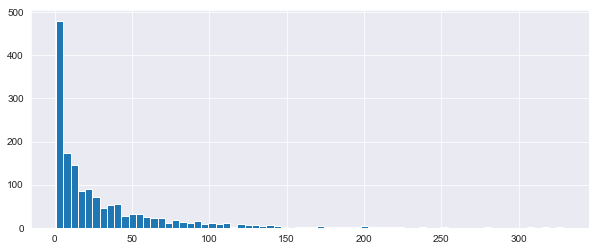

In [15]:
#creating a histogram with respect to number of ratings

plt.figure(figsize=(10,4))
ratings_title['num of ratings'].hist(bins=70)



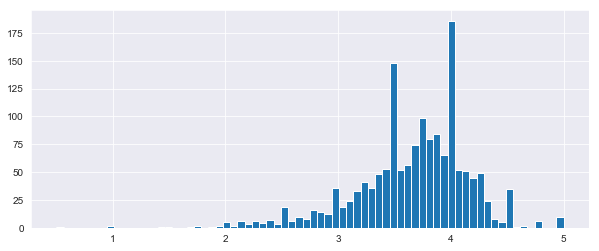

In [16]:
#creating histogram with respect to ratings
plt.figure(figsize=(10,4))
ratings_title['rating'].hist(bins=70)
#note:there are some outliers too

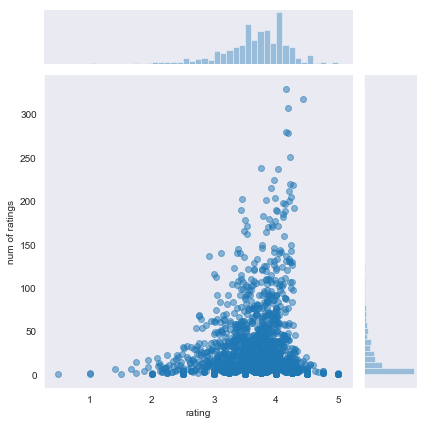

In [17]:
#now we are joining a histogram and a scatterplot both  using jointplot
#with respect to ratings on x axis and num of ratings on y axis

sns.jointplot(x='rating',y='num of ratings',data=ratings_title,alpha=0.5)

#the more congested region has more ratings
#basically scatter plot is used in order to compare variables

In [20]:
#now create a pivot table with index userid and titles as colums

moviemat=df.pivot_table(index='userId',columns='title',values='rating')
moviemat.head()          

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#ratings of the movie with number of ratings in descending order

ratings_title.sort_values('num of ratings',ascending=False).head(22)

,rating,num of ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [25]:
#now let us take the ratings given by users for forest gump and jurassic park

ForrestGump_ratings=moviemat['Forrest Gump (1994)']
JurassicPark_ratings=moviemat['Jurassic Park (1993)']
JurassicPark_ratings.head()

userId
1    4.0
2    NaN
3    NaN
4    NaN
5    NaN
Name: Jurassic Park (1993), dtype: float64

In [28]:
similar_to_jurassicpark=moviemat.corrwith(JurassicPark_ratings)


corr_jurassicpark=pd.DataFrame(similar_to_jurassicpark,columns=['correlation'])
#dropping nan 

corr_jurassicpark.dropna(inplace=True)

corr_jurassicpark.head()

,correlation
title,
"'burbs, The (1989)",0.104077
(500) Days of Summer (2009),-0.125237
*batteries not included (1987),0.290929
...And Justice for All (1979),-0.981981
10 Cent Pistol (2015),-1.000000


In [31]:
#now sort them by correlation values 

corr_jurassicpark.sort_values('correlation',ascending=False).head()



,correlation
title,
Thirst (Bakjwi) (2009),1.0
Popstar: Never Stop Never Stopping (2016),1.0
When the Cat's Away (Chacun cherche son chat) (1996),1.0
All the King's Men (1949),1.0
Babylon 5: In the Beginning (1998),1.0


In [ ]:
#this is how we recommend movies 
#suppose a person has seen jurassic park now the next movie he will be recomended is fugitive.
#based on correlation


In [32]:
#join with number of ratings
corr_jurassicpark=corr_jurassicpark.join(ratings_title['num of ratings'])
corr_jurassicpark.head()

,correlation,num of ratings
title,,
"'burbs, The (1989)",0.104077,NaN
(500) Days of Summer (2009),-0.125237,42.0
*batteries not included (1987),0.290929,NaN
...And Justice for All (1979),-0.981981,3.0
10 Cent Pistol (2015),-1.000000,NaN


In [1]:
#now lets sort values of correlation whos reviews are >150
corr_jurassicpark[corr_jurassicpark['num of ratings']>150].sort_values('correlation',ascending=False).head()


NameError: name 'corr_jurassicpark' is not defined